In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Dataset/Stress_dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label
0,0,0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0
1,1,1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0
2,2,2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0
3,3,3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0
4,4,4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713928 entries, 0 to 3713927
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0.1   int64  
 1   Unnamed: 0     int64  
 2   samples        object 
 3   acc_x          int64  
 4   acc_y          int64  
 5   acc_z          int64  
 6   EDA            float64
 7   HR             float64
 8   temperature    float64
 9   Date and time  object 
 10  label          int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 311.7+ MB


In [6]:
df.isna().sum()

Unnamed: 0.1           0
Unnamed: 0             0
samples                0
acc_x                  0
acc_y                  0
acc_z                  0
EDA              3249660
HR               3598208
temperature      3249728
Date and time          0
label                  0
dtype: int64

In [7]:
df=df.fillna(method='ffill')

C:\Users\busra\AppData\Local\Temp\ipykernel_27320\1718901248.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


In [8]:
df.isna().sum()

Unnamed: 0.1     0
Unnamed: 0       0
samples          0
acc_x            0
acc_y            0
acc_z            0
EDA              0
HR               0
temperature      0
Date and time    0
label            0
dtype: int64

In [9]:
df=df.drop(columns=['Unnamed: 0.1'], axis=1)

In [10]:
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [11]:
df.head()

,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label
0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0
1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0
2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0
3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0
4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0


In [12]:
df['Date and time']=pd.to_datetime(df['Date and time'])

In [13]:

df['hour'] = df['Date and time'].dt.hour
df['day_of_week'] = df['Date and time'].dt.dayofweek
df['month'] = df['Date and time'].dt.month
df['year'] = df['Date and time'].dt.year

In [14]:
df

,samples,acc_x,acc_y,acc_z,EDA,HR,temperature,Date and time,label,hour,day_of_week,month,year
0,S01,-2,43,43,0.000000,83.00,28.39,2022-02-07 09:27:41.000000,0,9,0,2,2022
1,S01,-2,44,46,0.112750,83.00,28.39,2022-02-07 09:27:41.031250,0,9,0,2,2022
2,S01,2,44,47,0.166563,72.67,28.39,2022-02-07 09:27:41.062500,0,9,0,2,2022
3,S01,3,43,44,0.167844,87.00,28.39,2022-02-07 09:27:41.093750,0,9,0,2,2022
4,S01,1,43,45,0.167844,80.00,28.39,2022-02-07 09:27:41.125000,0,9,0,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713923,S35,-17,1,62,0.228344,65.50,32.21,2022-03-09 16:10:46.781250,0,16,2,3,2022
3713924,S35,-17,2,62,0.228344,65.50,32.21,2022-03-09 16:10:46.812500,0,16,2,3,2022
3713925,S35,-17,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.843750,0,16,2,3,2022
3713926,S35,-16,1,61,0.228344,65.50,32.21,2022-03-09 16:10:46.875000,0,16,2,3,2022


In [17]:
df = pd.get_dummies(df, columns=['day_of_week', 'month'])

KeyError: "None of [Index(['day_of_week', 'month'], dtype='object')] are in the [columns]"

In [ ]:
df.head()

In [18]:
df=df.drop(columns=['Date and time','samples'])

In [19]:
df.describe()

,acc_x,acc_y,acc_z,EDA,HR,temperature,label,hour,year
count,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3.713928e+06,3713928.0
mean,-3.411041e+01,-1.266632e+00,3.756086e+01,5.797673e-01,7.669192e+01,3.044306e+01,2.941376e-01,1.239798e+01,2022.0
std,2.182198e+01,2.087270e+01,2.594190e+01,7.564431e-01,1.329531e+01,2.623050e+00,4.556542e-01,2.156371e+00,0.0
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,4.900000e+01,2.113000e+01,0.000000e+00,9.000000e+00,2022.0
25%,-5.200000e+01,-1.200000e+01,2.300000e+01,1.537600e-01,6.575000e+01,2.893000e+01,0.000000e+00,1.100000e+01,2022.0
50%,-3.400000e+01,-2.000000e+00,4.700000e+01,3.011310e-01,7.402000e+01,3.061000e+01,0.000000e+00,1.200000e+01,2022.0
75%,-2.100000e+01,8.000000e+00,5.700000e+01,7.333020e-01,8.582000e+01,3.197000e+01,1.000000e+00,1.500000e+01,2022.0
max,1.270000e+02,1.270000e+02,1.270000e+02,1.100507e+01,1.467800e+02,3.639000e+01,1.000000e+00,1.600000e+01,2022.0


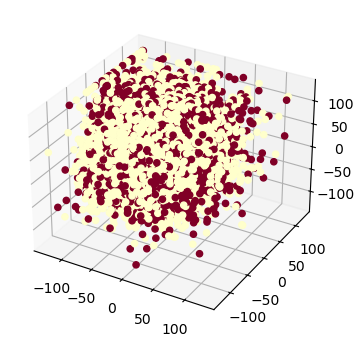

In [20]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(df['acc_x'], df['acc_y'], df['acc_z'], c=df['label'], cmap='YlOrRd', alpha=1)
plt.show()

In [21]:
# CSV dosyasına kaydetme
df.to_csv('guncel_stress_dataset.csv', index=False)

## Güncel Veri seti okuma

In [2]:
df = pd.read_csv("guncel_stress_dataset.csv")
df.head()

,acc_x,acc_y,acc_z,EDA,HR,temperature,label,hour,year,day_of_week_0,day_of_week_2,month_2,month_3
0,-2,43,43,0.000000,83.00,28.39,0,9,2022,True,False,True,False
1,-2,44,46,0.112750,83.00,28.39,0,9,2022,True,False,True,False
2,2,44,47,0.166563,72.67,28.39,0,9,2022,True,False,True,False
3,3,43,44,0.167844,87.00,28.39,0,9,2022,True,False,True,False
4,1,43,45,0.167844,80.00,28.39,0,9,2022,True,False,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713928 entries, 0 to 3713927
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   acc_x          int64  
 1   acc_y          int64  
 2   acc_z          int64  
 3   EDA            float64
 4   HR             float64
 5   temperature    float64
 6   label          int64  
 7   hour           int64  
 8   year           int64  
 9   day_of_week_0  bool   
 10  day_of_week_2  bool   
 11  month_2        bool   
 12  month_3        bool   
dtypes: bool(4), float64(3), int64(6)
memory usage: 269.2 MB


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)

#### Veriyi hazırla

In [4]:
X = df.drop(columns=['label'])  # Etiket sütunu çıkarılarak bağımsız değişkenler (X) seçiliyor.
Y = df['label']  # Etiket sütunu (bağımlı değişken) Y olarak atanıyor.

In [8]:
#veri bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2)

### Karar ağacı modeli

In [9]:
# 1. Karar Ağacı Modeli
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Performans Metrikleri
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Hiperparametre Optimizasyonu (Karar Ağacı)
params = {'max_depth': range(3, 20)}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Decision Tree Parameters:", grid.best_params_)

Decision Tree Metrics:
Accuracy: 0.93
Recall: 0.88
Precision: 0.89
F1 Score: 0.89
Confusion Matrix:
[[502120  22625]
 [ 26082 191959]]

Best Decision Tree Parameters: {'max_depth': 19}


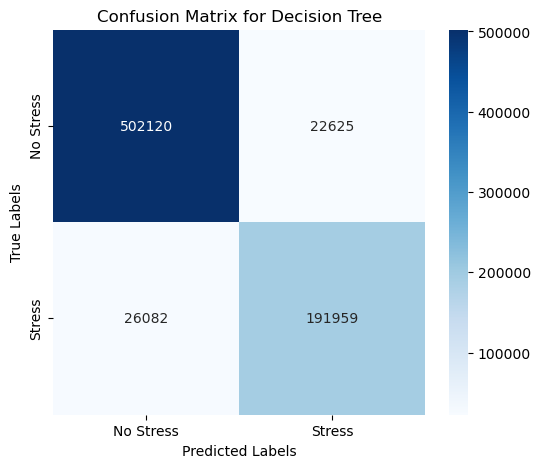

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Karar Ağacı için Karmaşıklık Matrisi
plot_confusion_matrix(y_test, y_pred, "Decision Tree")

### Rastgele Orman Modeli

In [11]:
# 2. Rastgele Orman Modeli
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}\n")

# Çapraz Doğrulama (Rastgele Orman)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, test_idx in kf.split(X, Y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = Y.iloc[train_idx], Y.iloc[test_idx]
    rf.fit(X_train_cv, y_train_cv)
    cv_scores.append(rf.score(X_test_cv, y_test_cv))

print("Random Forest Cross-Validation Accuracy:", pd.Series(cv_scores).mean())


Random Forest Metrics:
Accuracy: 0.94
Recall: 0.89
Precision: 0.91
F1 Score: 0.90
Confusion Matrix:
[[505402  19343]
 [ 23964 194077]]

Random Forest Cross-Validation Accuracy: 0.9415874514373627


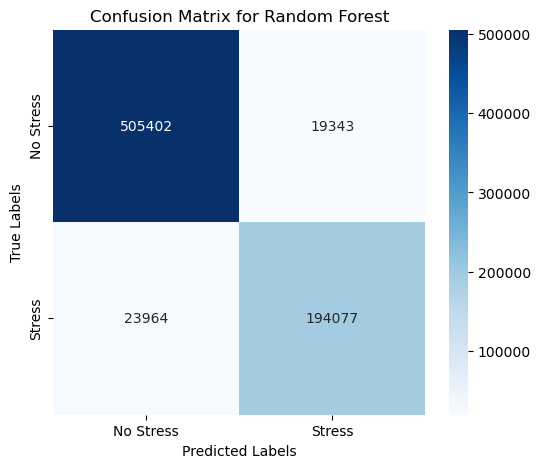

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Stress'], yticklabels=['No Stress', 'Stress'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Rastgele Orman için Karmaşıklık Matrisi
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def report_metrics(y_true, y_pred, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }
    return pd.DataFrame([metrics])

# Karar Ağacı ve Rastgele Orman Metrikleri
decision_tree_metrics = report_metrics(y_test, y_pred, "Decision Tree")
random_forest_metrics = report_metrics(y_test, y_pred_rf, "Random Forest")

# Metrikleri Birleştirme ve Görüntüleme
all_metrics = pd.concat([decision_tree_metrics, random_forest_metrics], ignore_index=True)
print(all_metrics)


           Model  Accuracy    Recall  Precision  F1 Score
0  Decision Tree  0.934427  0.880380   0.894563  0.887415
1  Random Forest  0.941697  0.890094   0.909367  0.899627


#### Çubuk Grafiği

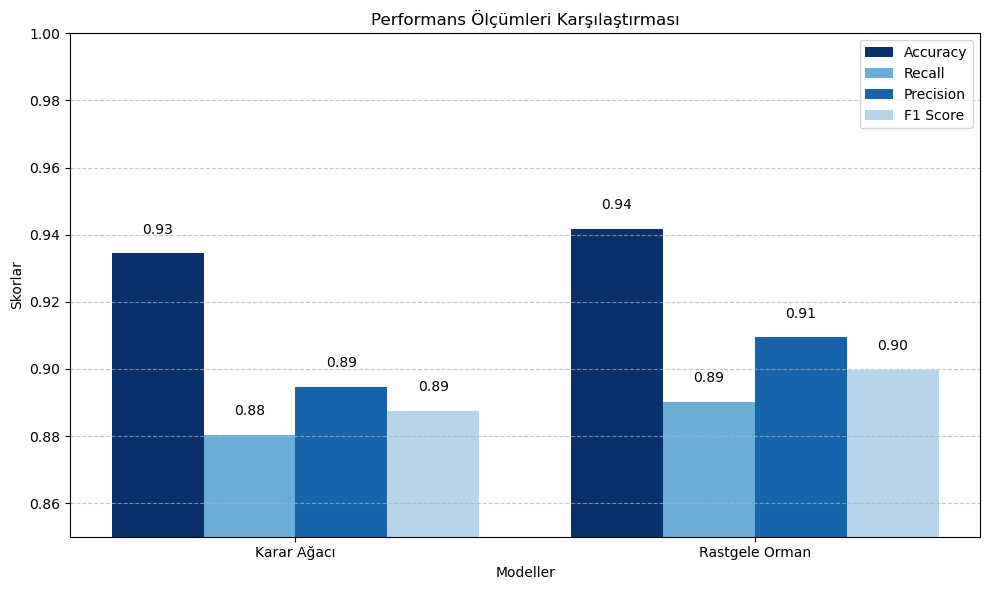

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Metrikleri tanımlama
models = ['Karar Ağacı', 'Rastgele Orman']
accuracy = [0.934427, 0.941697]
recall = [0.880380, 0.890094]
precision = [0.894563, 0.909367]
f1_score = [0.887415, 0.899627]

# Çubuk grafiği verileri
x = np.arange(len(models))  # Model isimleri için pozisyonlar
width = 0.2  # Çubukların genişliği

# Çubukların çizimi
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width*1.5, accuracy, width, label='Accuracy', color=plt.cm.Blues(1.0))
bars2 = plt.bar(x - width/2, recall, width, label='Recall', color=plt.cm.Blues(0.5))
bars3 = plt.bar(x + width/2, precision, width, label='Precision', color=plt.cm.Blues(0.8))
bars4 = plt.bar(x + width*1.5, f1_score, width, label='F1 Score', color=plt.cm.Blues(0.3))


# Çubukların üstüne değer yazma
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.005, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10, color='black')

# Grafik düzenlemeleri
plt.xlabel('Modeller')
plt.ylabel('Skorlar')
plt.title('Performans Ölçümleri Karşılaştırması')
plt.xticks(x, models)
plt.ylim(0.85, 1.0)  # Skor aralığını ayarlama
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster
plt.show()


#### Radar Grafiği

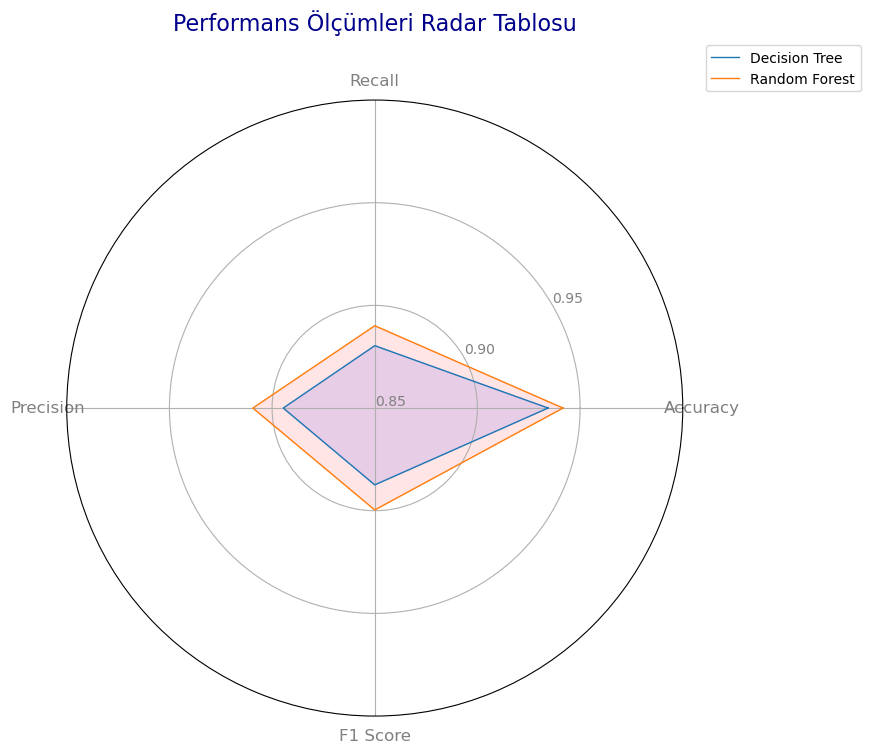

In [28]:
from math import pi

# Metriklerin düzenlenmesi
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
values_dt = [0.934427, 0.880380, 0.894563, 0.887415]
values_rf = [0.941697, 0.890094, 0.909367, 0.899627]

# Radar grafiği için verilerin hazırlığı
categories = metrics
num_vars = len(categories)

# Açıların hesaplanması
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # İlk açıyı tekrar ekleme

# Model değerlerini kapatmak için ilk değerleri ekleme
values_dt += values_dt[:1]
values_rf += values_rf[:1]

# Radar grafiği çizimi
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Eksen ayarları
plt.xticks(angles[:-1], categories, color='grey', size=12)
ax.set_rlabel_position(30)
plt.yticks([0.85, 0.9, 0.95], ["0.85", "0.90", "0.95"], color="grey", size=10)
plt.ylim(0.85, 1)

# Decision Tree Radar Grafiği
ax.plot(angles, values_dt, linewidth=1, linestyle='solid', label='Decision Tree')
ax.fill(angles, values_dt, color='b', alpha=0.1)

# Random Forest Radar Grafiği
ax.plot(angles, values_rf, linewidth=1, linestyle='solid', label='Random Forest')
ax.fill(angles, values_rf, color='r', alpha=0.1)

# Başlık ve efsane
plt.title('Performans Ölçümleri Radar Tablosu', size=16, color='darkblue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Grafiği göster
plt.show()


### Modelleri Kaydetme

In [27]:
import pickle

# Karar Ağacı Modelini Kaydetme
with open("decision_tree_model.pkl", "wb") as file:
    pickle.dump(clf, file)

# Random Forest Modelini Kaydetme
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Modeller başarıyla kaydedildi.")

Modeller başarıyla kaydedildi.
